Train directory exists: True
Test directory exists: True
Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Class names: ['cats', 'dogs']
Found 2023 files belonging to 2 classes.
Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 248ms/step - accuracy: 0.5413 - loss: 0.7485 - val_accuracy: 0.6102 - val_loss: 0.6520
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 50s 247ms/step - accuracy: 0.6996 - loss: 0.5729 - val_accuracy: 0.7289 - val_loss: 0.5472
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 50s 246ms/step - accuracy: 0.7568 - loss: 0.4989 - val_accuracy: 0.7470 - val_loss: 0.5443
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 50s 246ms/step - accuracy: 0.8033 - loss: 0.4230 - val_accuracy: 0.7264 - val_loss: 0.5890
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 50s 247ms/step - accuracy: 0.8535 - loss: 0.3348 - val_accuracy: 0.7402 - val_loss: 0.6448


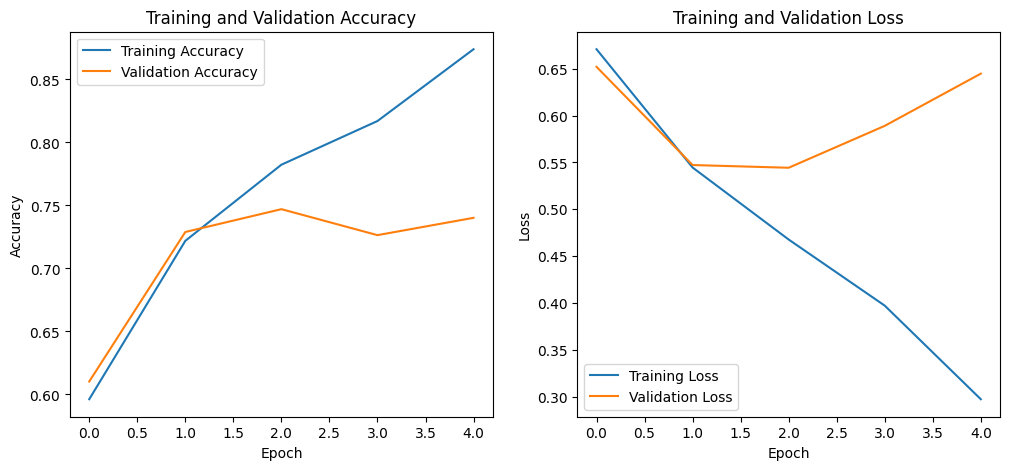

64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8056 - loss: 0.5378
Test Accuracy: 74.64%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


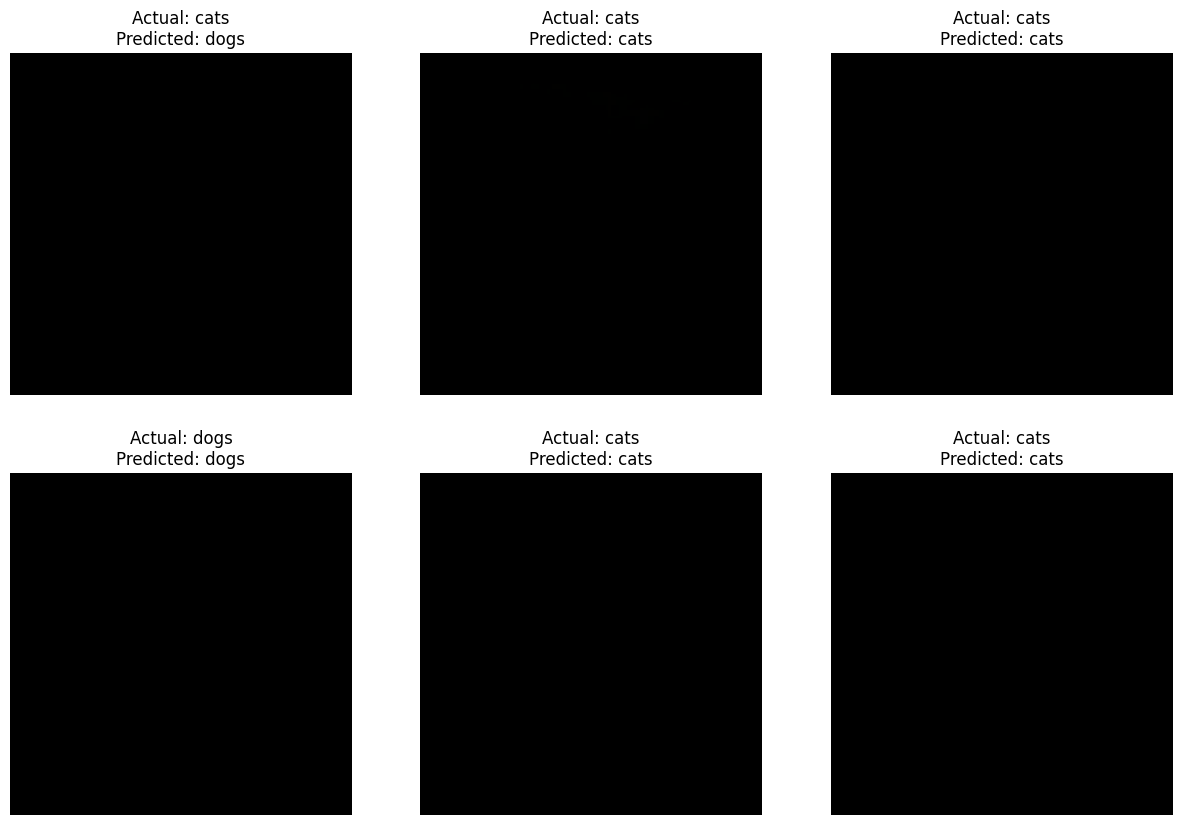

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


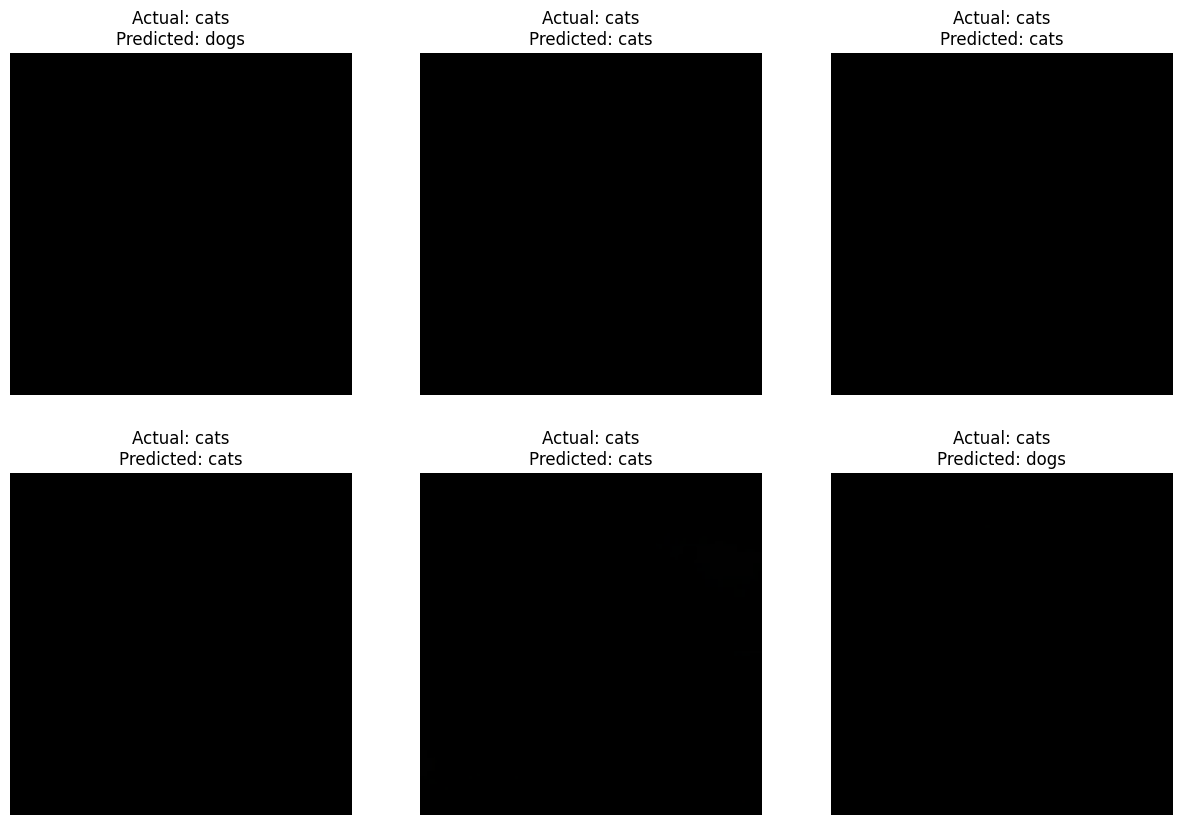

In [11]:
# Import necessary libraries
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Define dataset directories
train_dir = r'C:\Users\ujjaw\Downloads\archive\training_set\training_set'
test_dir = r'C:\Users\ujjaw\Downloads\archive\test_set\test_set'

# Verify directories exist
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Test directory exists: {os.path.exists(test_dir)}")

# Parameters
img_size = (128, 128)
batch_size = 32

# Load training dataset with 80% training and 20% validation split
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

# Extract class names before dataset transformations
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Load test dataset (no shuffle)
test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

# Normalize pixel values from [0,255] to [0,1]
normalization_layer = layers.Rescaling(1.0/255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Prefetch datasets for performance optimization
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Build CNN model as per assignment:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile model with loss, optimizer and metric
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

# Plot training and validation accuracy and loss curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate model on test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Visualize predictions on few validation images
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)

    plt.figure(figsize=(15, 10))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual = class_names[labels[i]]
        predicted = class_names[preds[i][0]]
        plt.title(f"Actual: {actual}\nPredicted: {predicted}")
        plt.axis("off")
    plt.show()

# Visualize predictions on few test images
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)

    plt.figure(figsize=(15,10))
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual = class_names[labels[i]]
        predicted = class_names[preds[i][0]]
        plt.title(f"Actual: {actual}\nPredicted: {predicted}")
        plt.axis('off')
    plt.show()
